In [25]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K

In [26]:
(mnist_train_images,mninst_train_labels),(mnist_test_images,mnist_test_labels)  = mnist.load_data()

In [27]:
if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [28]:
#convert training and testing labels into one hot
train_labels = tensorflow.keras.utils.to_categorical(mninst_train_labels,10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels,10)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


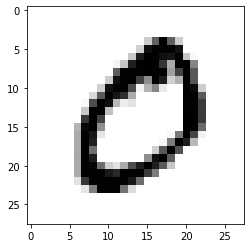

In [29]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    #plt.plot()
    
display_sample(1)
    

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metics = ['accuracy'])

In [33]:
history = model.fit(train_images,train_labels,batch_size=32,epochs=10,verbose=2, validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 143s - loss: 0.1910 - val_loss: 0.0491
Epoch 2/10
60000/60000 - 162s - loss: 0.0797 - val_loss: 0.0331
Epoch 3/10
60000/60000 - 146s - loss: 0.0603 - val_loss: 0.0286
Epoch 4/10
60000/60000 - 140s - loss: 0.0500 - val_loss: 0.0330
Epoch 5/10
60000/60000 - 140s - loss: 0.0430 - val_loss: 0.0314
Epoch 6/10
60000/60000 - 142s - loss: 0.0349 - val_loss: 0.0314
Epoch 7/10
60000/60000 - 140s - loss: 0.0337 - val_loss: 0.0351
Epoch 8/10
60000/60000 - 142s - loss: 0.0289 - val_loss: 0.0313
Epoch 9/10
60000/60000 - 143s - loss: 0.0247 - val_loss: 0.0291
Epoch 10/10
60000/60000 - 144s - loss: 0.0235 - val_loss: 0.0299


In [37]:
score = model.evaluate(test_images,test_labels,verbose=0)
print('Test loss:', score)
    

Test loss: 0.02985681462371315
